In [85]:
import pandas as pd
import seaborn as sea
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

tf.set_random_seed(123)    

In [113]:
dataSet = pd.read_csv('C:/Users/Antonio/Documents/GitHub/evaluacion-Lirb/Diabetes/diabetes.csv',
                       na_values='*', comment='\t',sep=',',skipinitialspace=True)
copy_DS = dataSet.copy()


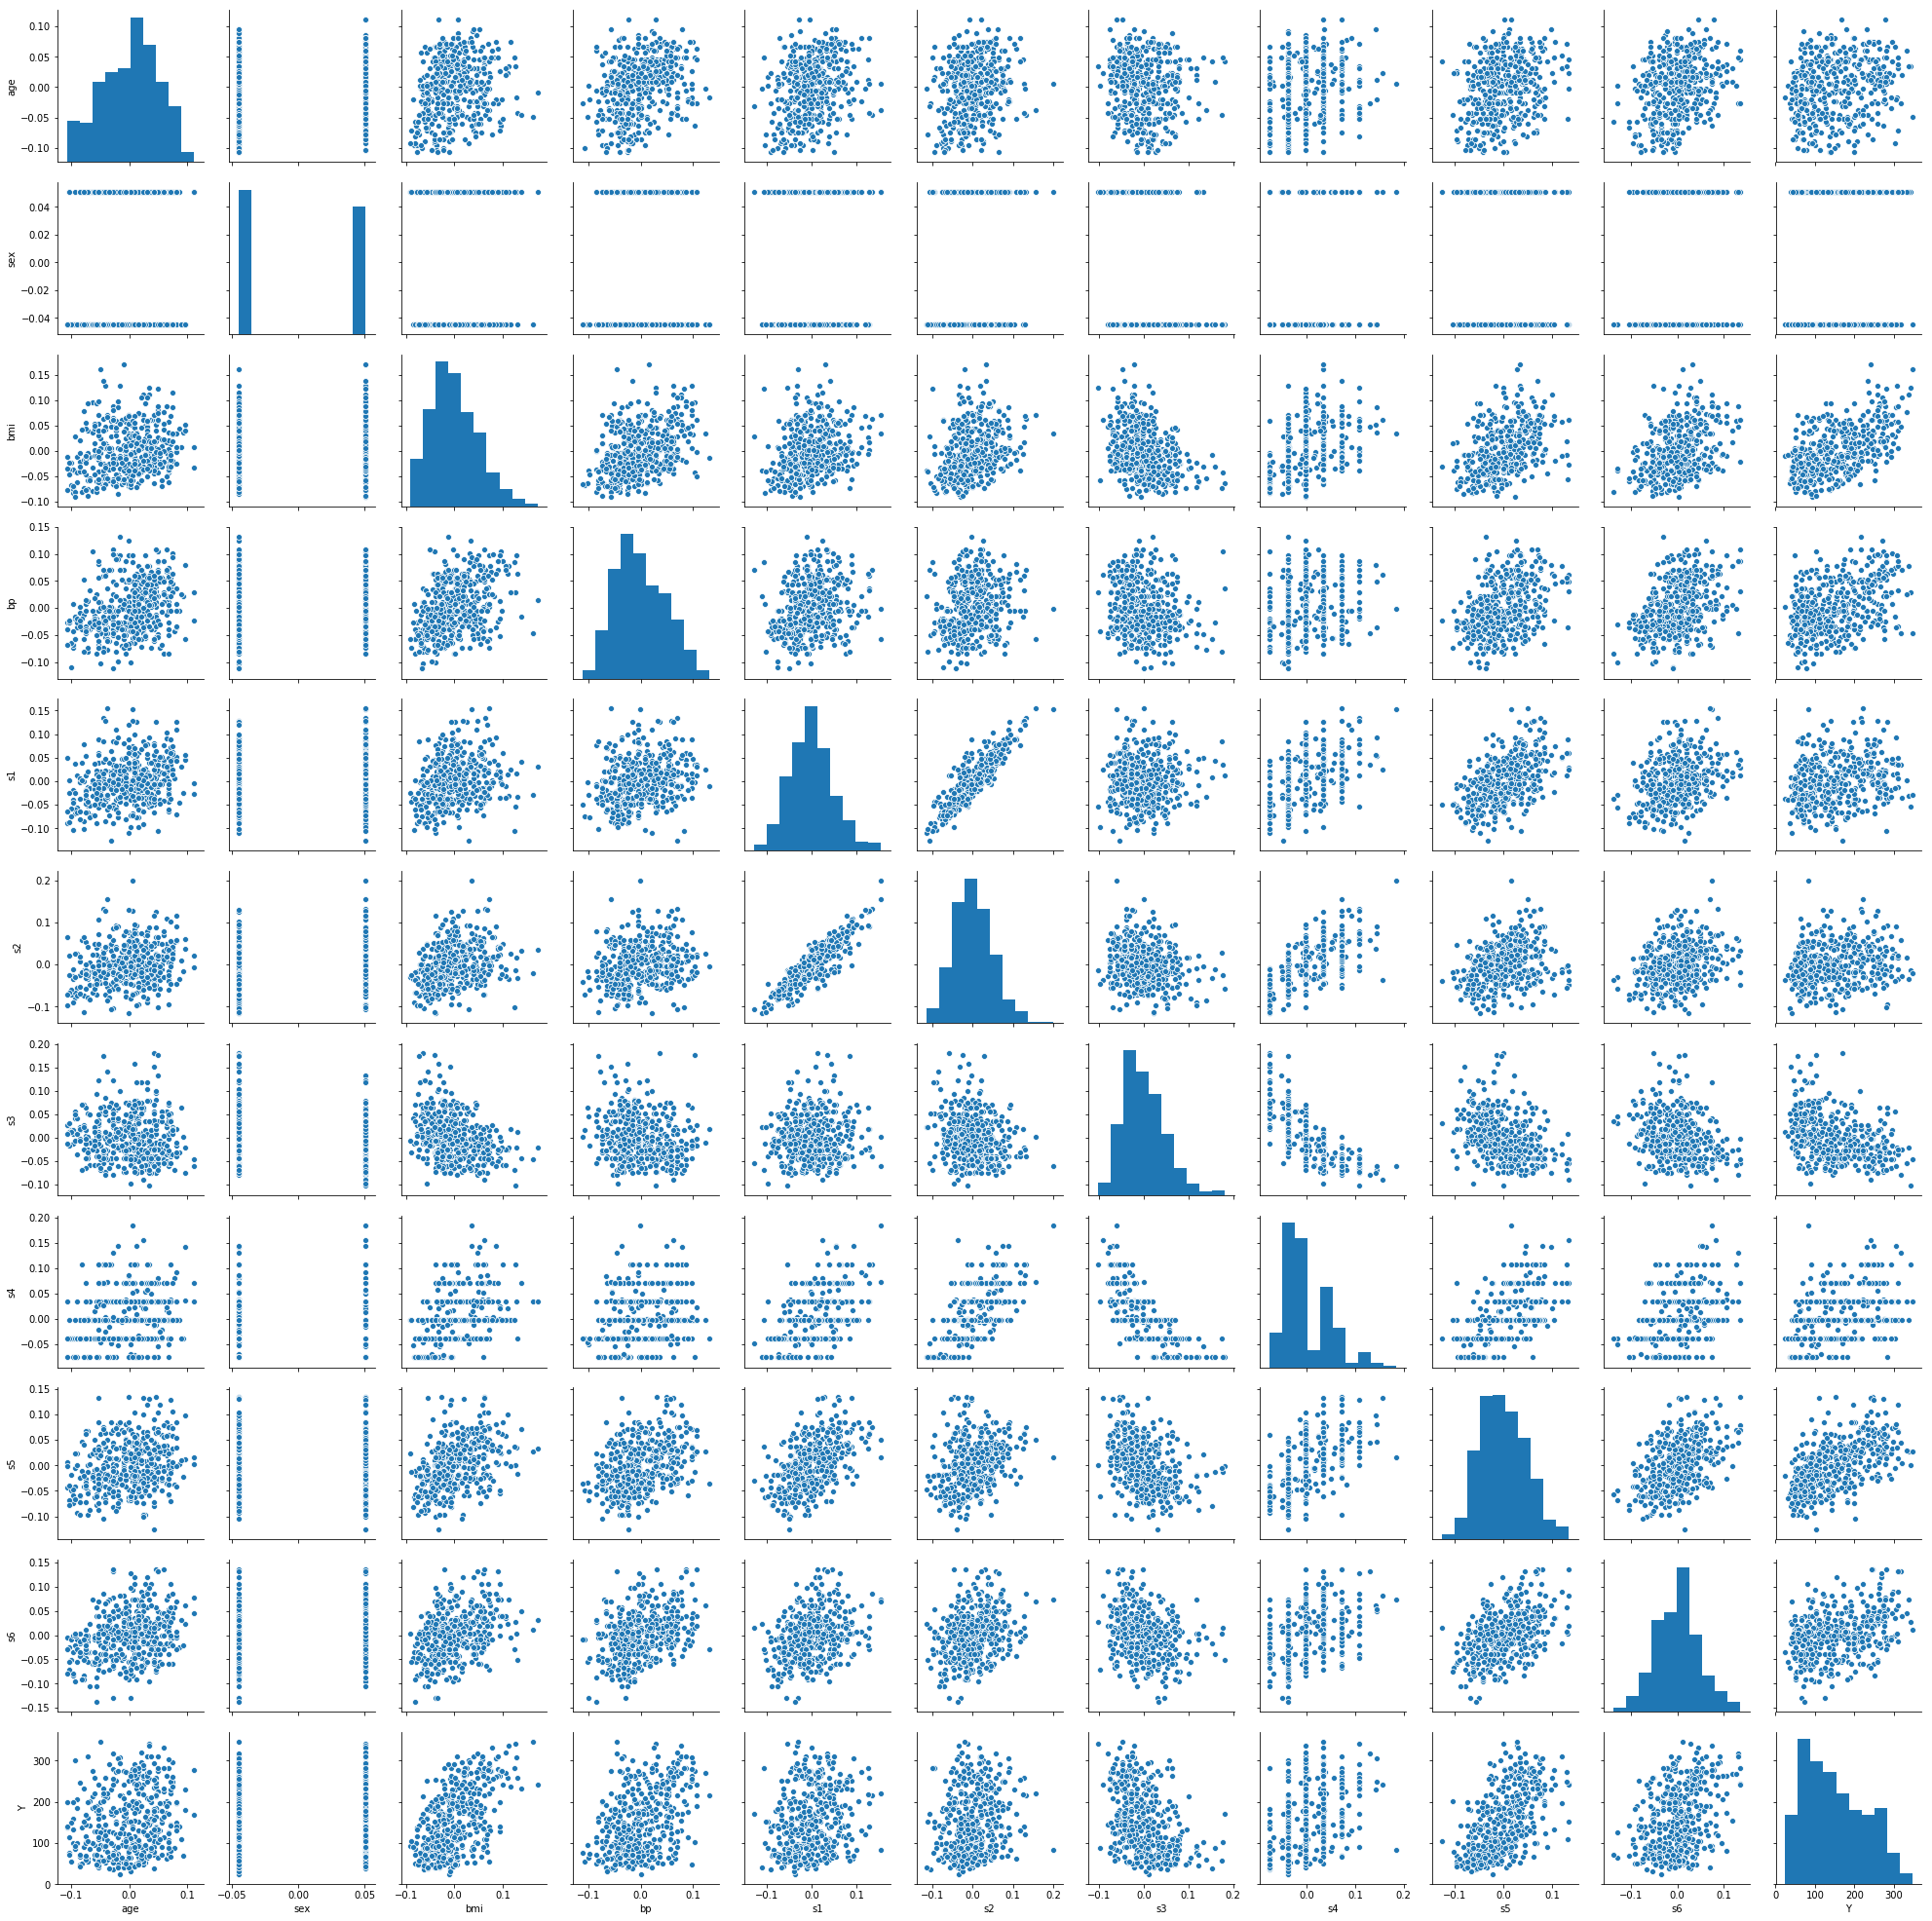

In [114]:
sea.pairplot(copy_DS)

In [110]:
def normalize():
   
    for i in copy_DS.columns:
        copy_DS[i] = (copy_DS[i]- copy_DS[i].min())/(copy_DS[i].max()-copy_DS[i].min())+1
       
    return 0
normalize()
copy_DS.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,1.491968,1.468326,1.346107,1.459818,1.451668,1.367725,1.360889,1.291996,1.485557,1.503942,1.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.320833,1.000000,1.214876,1.309859,1.329657,1.271165,1.237013,1.141044,1.357528,1.382576,1.193146
50%,1.516667,1.000000,1.318182,1.436620,1.436275,1.355578,1.337662,1.282087,1.478057,1.500000,1.359813
75%,1.666667,2.000000,1.465909,1.605634,1.552696,1.462649,1.464286,1.423131,1.610446,1.606061,1.580997
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [111]:
#print(copy_DS.columns)
copy_DS['Y'] = np.log(copy_DS['Y'])
copy_DS['bmi'] = np.log(copy_DS['bmi'])
copy_DS['bp'] = np.log(copy_DS['bp'])
copy_DS['s4'] = np.power(copy_DS['s4'],-1)
copy_DS['s3'] = np.log(copy_DS['s3'])
copy_DS['s2'] = np.log(copy_DS['s2'])
copy_DS.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,1.666667,2.0,0.459097,0.437800,1.294118,0.228706,0.188794,0.779978,1.562217,1.439394,0.331117
1,1.483333,1.0,0.138683,0.301668,1.421569,0.267561,0.484508,0.876391,1.222443,1.166667,0.144761
2,1.883333,2.0,0.416424,0.362293,1.289216,0.230289,0.220543,0.779978,1.496584,1.409091,0.308492
3,1.083333,1.0,0.263635,0.269920,1.495098,0.369638,0.210071,0.702676,1.572936,1.469697,0.447159
4,1.516667,1.0,0.187816,0.437800,1.465686,0.348775,0.329023,0.779978,1.362369,1.333333,0.294667


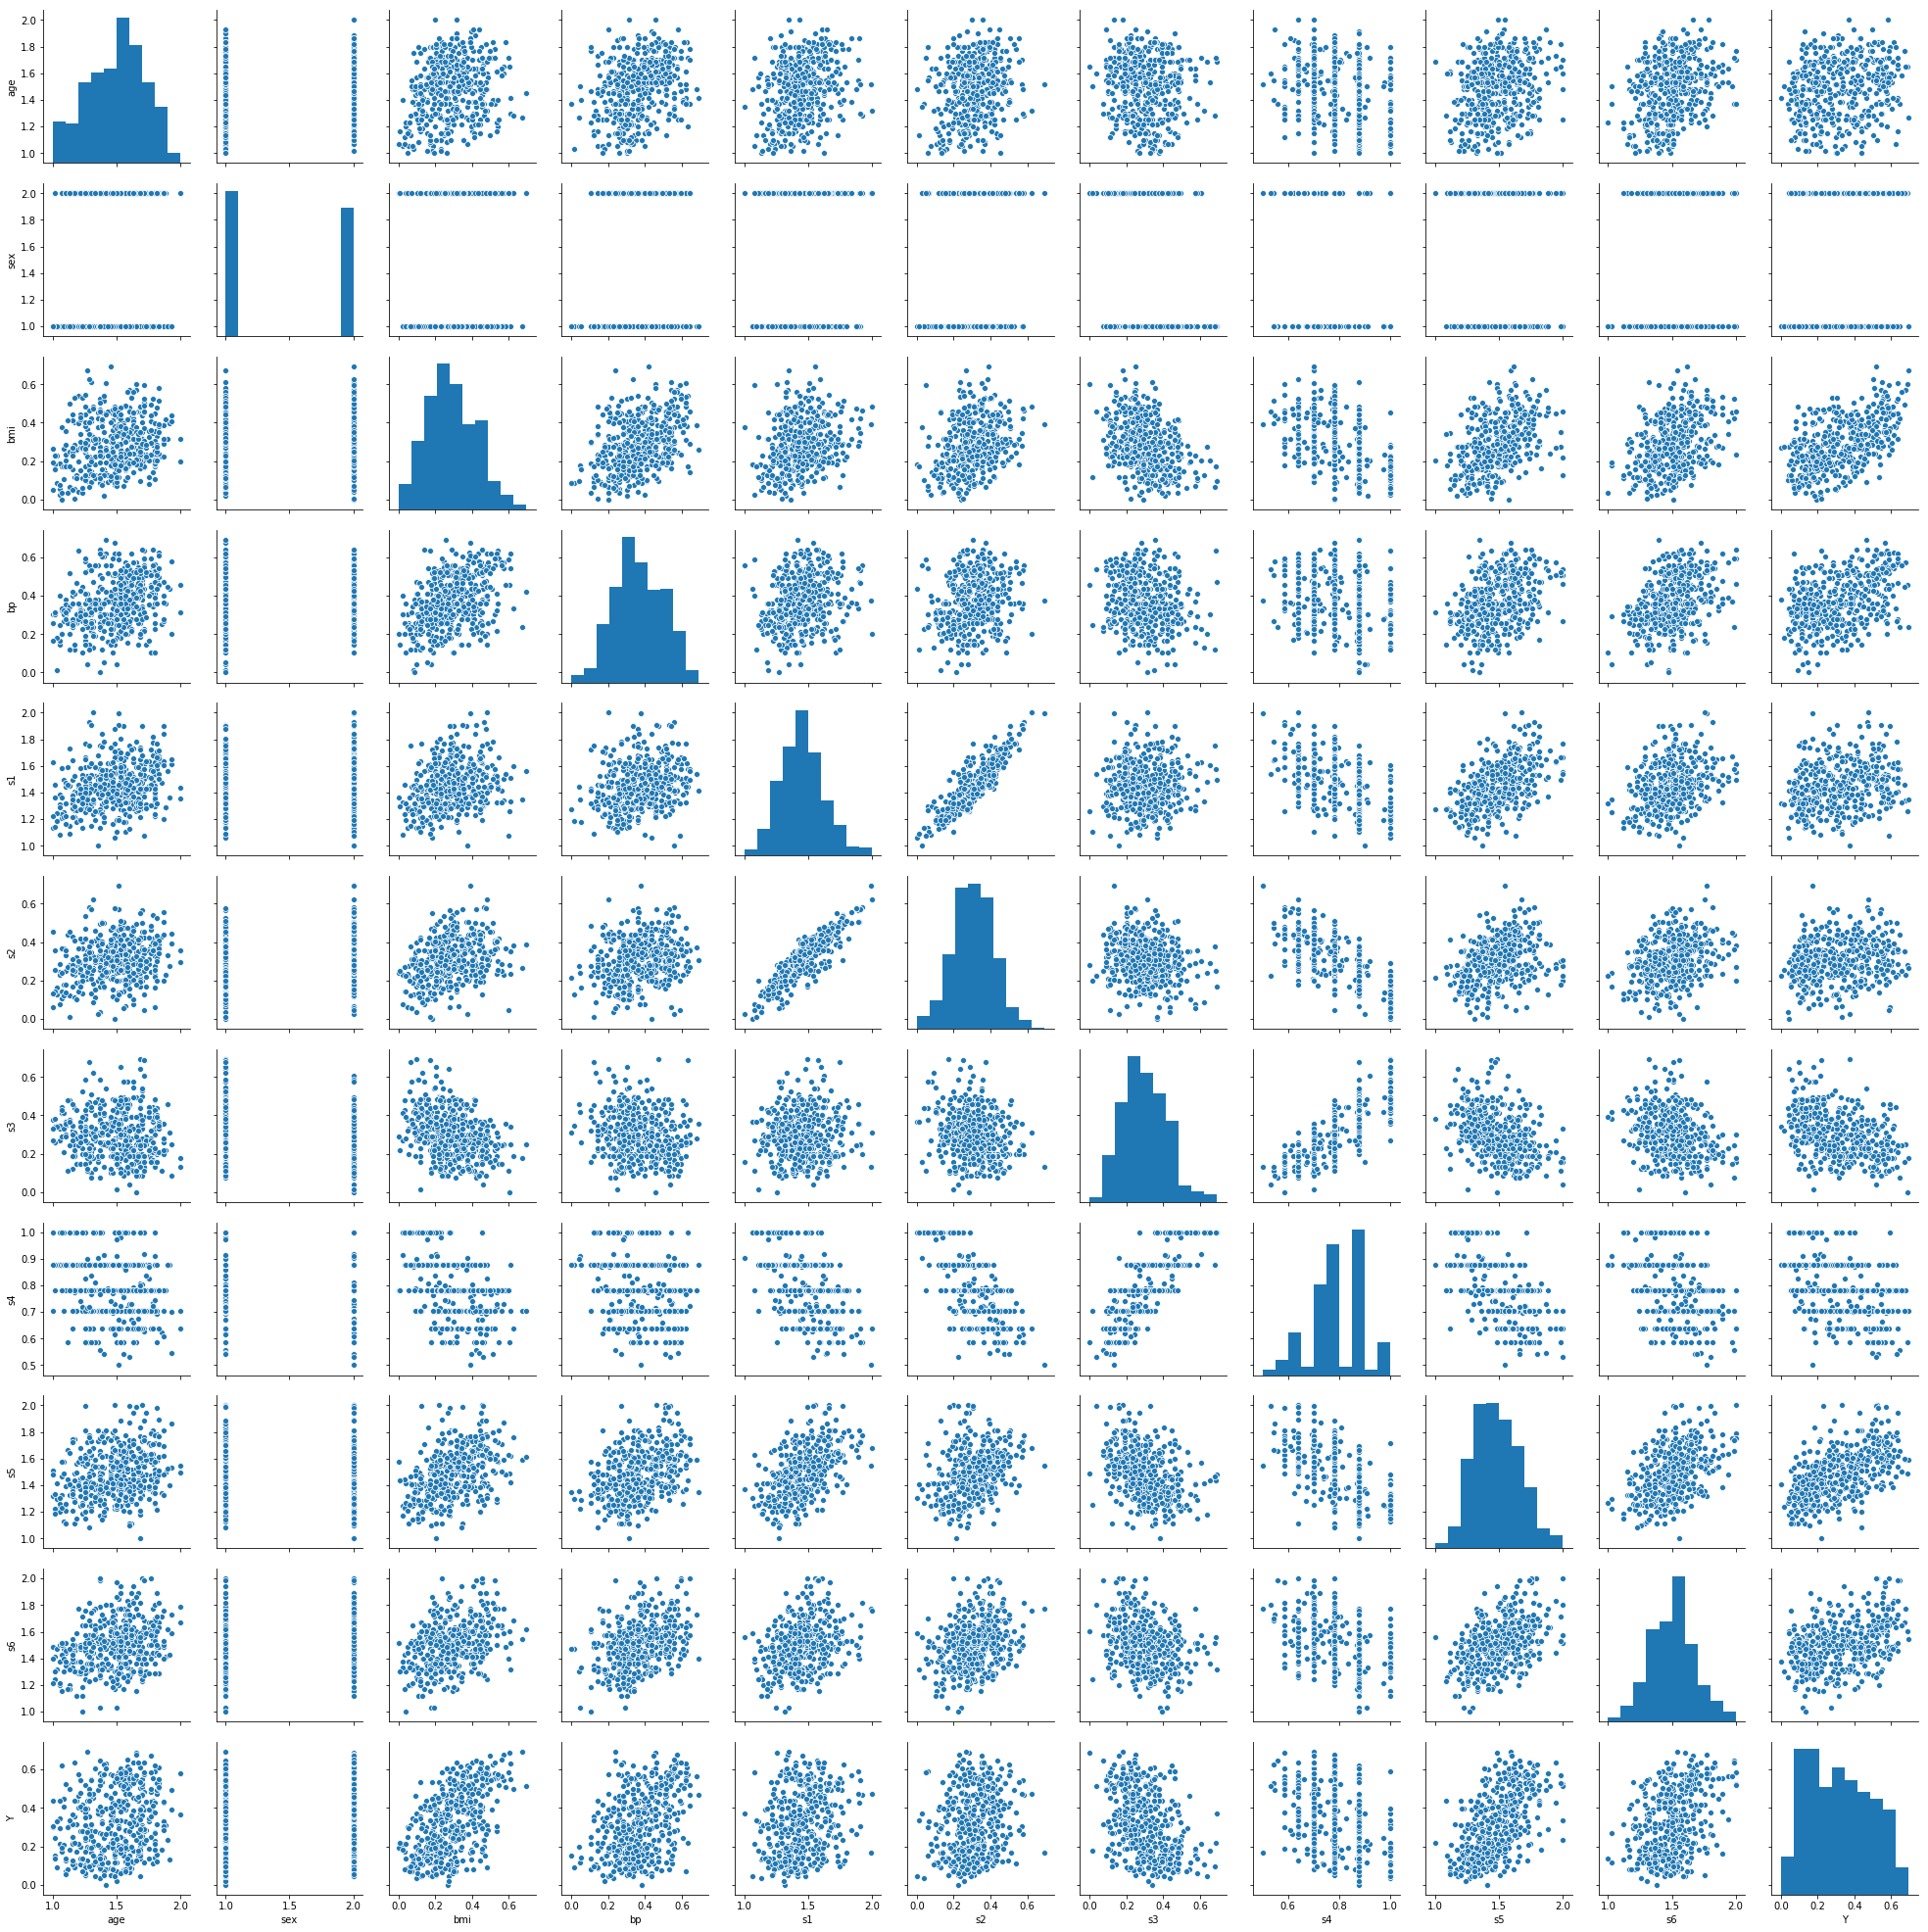

In [112]:
sea.pairplot(copy_DS)

In [53]:
copy_DS.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


{'whiskers': [<matplotlib.lines.Line2D at 0x14f141bdeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x14f141cb860>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f141bdd68>],
 'medians': [<matplotlib.lines.Line2D at 0x14f141cbef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f141cbfd0>],
 'means': []}

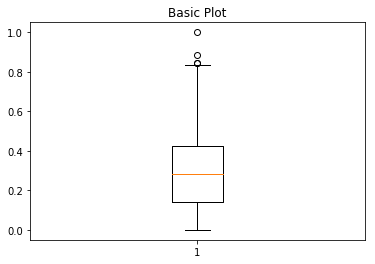

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(copy_DS['s4'])

In [5]:
dataset_train = copy_DS.sample(frac=0.75,random_state=0)
train_y = dataset_train['Y']
dataset_train.drop(columns='Y', inplace=True)

dataset_test = copy_DS.drop(dataset_train.index)
test_y = dataset_test['Y']
dataset_test.drop(columns='Y', inplace=True)




In [20]:
w0 = tf.Variable(tf.zeros(1, dtype=tf.float64))
w1 = tf.Variable(tf.truncated_normal([10, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
learning_rate = 0.1

x = tf.constant(dataset_train)
y = tf.constant(train_y)

def pred(x,y):
    
    prediction = tf.add(w0,tf.matmul(x,w1))
    error = tf.reduce_mean(tf.abs(tf.subtract(y, prediction)))
    return [prediction , error]


p,error = pred(x,y)
epochs = 500
points = [[], []]
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(error)
   

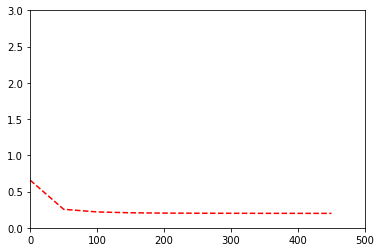

Test error = 0.2167827784855821 



In [21]:
with tf.Session() as sess:
    sess.run(init)
    for i in list(range(epochs)):
        sess.run(optimizer)
        if(i % 50 == 0):
            points[0].append(i)
            points[1].append(sess.run(error))
    plt.plot()
    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 0, 3])
    plt.show()
    test_error = pred(dataset_test, test_y)[1]
    print('Test error =', sess.run(test_error), '\n')
   

In [22]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(w1),sess.run(w0))

[[ 0.83080899]
 [-0.16495572]
 [ 0.02641016]
 [ 0.40940675]
 [ 0.05384041]
 [-0.85173777]
 [ 0.5277887 ]
 [-0.37281605]
 [-1.00074235]
 [-0.68954706]] [0.]


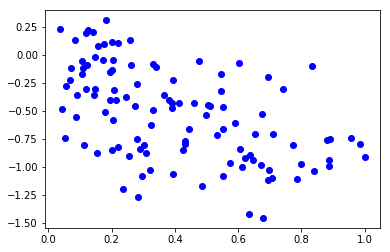

In [23]:
with tf.Session() as sess:
    fitted_values = pred(dataset_test,test_y)[0]
    sess.run(init)
    aux = fitted_values.eval().tolist()
    fitt = [aux[i][0] for i in range(110)]
    true_values = test_y.values.tolist()
    np.reshape(true_values,(110,))
    points[0]=true_values
    points[1]=fitt
    plt.plot(points[0],points[1],'bo')
